In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
GMT = pd.read_csv('../data/Proj/UseData/Unique_MTs_sim.csv')
BMT = pd.read_csv('../data/Proj/UseData/Unique_BMTs_sim.csv')
list_100 = pd.read_csv('../data/Proj/UseData/100_name_list.csv')
plus_100 = pd.read_csv('../data/Proj/UseData/100_plus_list.csv')

GMT.drop(columns = ['Unnamed: 0'], axis=1, inplace=True)
BMT.drop(columns = ['Unnamed: 0'], axis=1, inplace=True)
list_100.drop(columns = ['Unnamed: 0'], axis=1, inplace=True)

In [3]:
GMT = GMT[GMT['MNTN_HEIGHT'] > 0]
BMT = BMT[BMT['MNTN_HEIGHT'] > 0]

In [4]:
list_100.rename(columns={'0':'name'}, inplace=True)

In [5]:
GMT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 703 entries, 1 to 1550
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MNTN_CODE    703 non-null    int64  
 1   MNTN_NM      703 non-null    object 
 2   MNTN_LOC     703 non-null    object 
 3   MNTN_HEIGHT  703 non-null    int64  
 4   ROAD_EASY    703 non-null    float64
 5   ROAD_MID     703 non-null    float64
 6   ROAD_DIFF    703 non-null    float64
 7   ROAD_SUM     703 non-null    float64
 8   MNTN_RES     703 non-null    object 
 9   Sel_Cos      703 non-null    float64
 10  Raw_Cos      703 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 65.9+ KB


In [6]:
BMT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 3 to 659
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MNTN_CODE    111 non-null    int64  
 1   MNTN_NM      111 non-null    object 
 2   MNTN_LOC     111 non-null    object 
 3   MNTN_HEIGHT  111 non-null    int64  
 4   ROAD_EASY    111 non-null    float64
 5   ROAD_MID     111 non-null    float64
 6   ROAD_DIFF    111 non-null    float64
 7   ROAD_SUM     111 non-null    float64
 8   MNTN_RES     111 non-null    object 
 9   Sel_Cos      111 non-null    float64
 10  Raw_Cos      111 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 10.4+ KB


In [7]:
cnt = 0
for i in range(703):
    if GMT.iloc[i]['MNTN_NM'] in list(plus_100['name']):
        cnt += 1
cnt

70

In [8]:
column = list(GMT.columns)
goodmn = list(list_100['name'].values)

In [9]:
mntn_nm = pd.read_csv('../data/Proj/MT_rname.csv')

#### 100대 명산 데이터 프레임

In [10]:
GMT_100 = pd.DataFrame(columns = column)

In [11]:
for i in range(703):
    if GMT.iloc[i,1] in goodmn:
        GMT_100 = GMT_100.append(pd.DataFrame([list(GMT.iloc[i].values)], columns = column), ignore_index=True)

In [12]:
GMT_100['label'] = 1
BMT['label'] = 0

In [13]:
for i in range(111):
    if BMT.iloc[i,1] == '깃대봉':
        print(i)

39


In [14]:
BMT.iloc[39:40, 11] = 1

In [15]:
BMT.iloc[39:40]

,MNTN_CODE,MNTN_NM,MNTN_LOC,MNTN_HEIGHT,ROAD_EASY,ROAD_MID,ROAD_DIFF,ROAD_SUM,MNTN_RES,Sel_Cos,Raw_Cos,label
255,291100401,깃대봉,"경상남도 함양군 서상면, 전라북도 장수군 장계면",1015,41.69,1.37,0.0,43.06,<item><crcmrsghtngetcimageseq>http://www.fores...,0.361158,0.093856,1


#### Train data set

In [16]:
MT_tr = pd.concat([GMT_100, BMT])

In [17]:
MT_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 659
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MNTN_CODE    187 non-null    object 
 1   MNTN_NM      187 non-null    object 
 2   MNTN_LOC     187 non-null    object 
 3   MNTN_HEIGHT  187 non-null    object 
 4   ROAD_EASY    187 non-null    float64
 5   ROAD_MID     187 non-null    float64
 6   ROAD_DIFF    187 non-null    float64
 7   ROAD_SUM     187 non-null    float64
 8   MNTN_RES     187 non-null    object 
 9   Sel_Cos      187 non-null    float64
 10  Raw_Cos      187 non-null    float64
 11  label        187 non-null    int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 19.0+ KB


## Train data model training

In [82]:
MT_train = MT_tr[['MNTN_HEIGHT', 'ROAD_EASY', 'ROAD_MID', 'ROAD_DIFF', 'ROAD_SUM', 'Sel_Cos', 'Raw_Cos', 'label']]
MT_train

,MNTN_HEIGHT,ROAD_EASY,ROAD_MID,ROAD_DIFF,ROAD_SUM,Sel_Cos,Raw_Cos,label
0,758,39.39,1.61,0.0,41.00,0.751809,0.171892,1
1,920,178.70,0.43,0.0,179.13,0.859727,0.194907,1
2,1468,114.34,3.30,0.0,117.64,0.807573,0.175589,1
3,877,21.92,0.00,0.0,21.92,0.751809,0.178697,1
4,1111,5.34,0.00,0.0,5.34,0.807573,0.175589,1
...,...,...,...,...,...,...,...,...
640,548,1.36,0.00,0.0,1.36,0.589768,0.115745,0
643,935,10.76,0.00,0.0,10.76,0.294884,0.085678,0
649,175,1.67,0.00,0.0,1.67,0.294884,0.116535,0
657,1036,9.78,0.00,0.0,9.78,0.551677,0.091880,0


In [ ]:
MT_train.to_csv('../data/Proj/UseData/MT_train_z.csv', encoding='utf-8', index=False)

In [18]:
MT_train = pd.read_csv('../data/Proj/UseData/MT_train_z.csv')
MT_train

,MNTN_HEIGHT,ROAD_EASY,ROAD_MID,ROAD_DIFF,ROAD_SUM,Sel_Cos,Raw_Cos,label
0,758,39.39,1.61,0.0,41.00,0.751809,0.171892,1
1,920,178.70,0.43,0.0,179.13,0.859727,0.194907,1
2,1468,114.34,3.30,0.0,117.64,0.807573,0.175589,1
3,877,21.92,0.00,0.0,21.92,0.751809,0.178697,1
4,1111,5.34,0.00,0.0,5.34,0.807573,0.175589,1
...,...,...,...,...,...,...,...,...
182,548,1.36,0.00,0.0,1.36,0.589768,0.115745,0
183,935,10.76,0.00,0.0,10.76,0.294884,0.085678,0
184,175,1.67,0.00,0.0,1.67,0.294884,0.116535,0
185,1036,9.78,0.00,0.0,9.78,0.551677,0.091880,0


#### 모델에 적용할 train data

In [19]:
MT_train.drop(['ROAD_SUM'], axis=1, inplace=True)
MT_train

,MNTN_HEIGHT,ROAD_EASY,ROAD_MID,ROAD_DIFF,Sel_Cos,Raw_Cos,label
0,758,39.39,1.61,0.0,0.751809,0.171892,1
1,920,178.70,0.43,0.0,0.859727,0.194907,1
2,1468,114.34,3.30,0.0,0.807573,0.175589,1
3,877,21.92,0.00,0.0,0.751809,0.178697,1
4,1111,5.34,0.00,0.0,0.807573,0.175589,1
...,...,...,...,...,...,...,...
182,548,1.36,0.00,0.0,0.589768,0.115745,0
183,935,10.76,0.00,0.0,0.294884,0.085678,0
184,175,1.67,0.00,0.0,0.294884,0.116535,0
185,1036,9.78,0.00,0.0,0.551677,0.091880,0


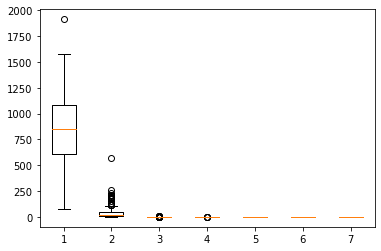

In [20]:
plt.boxplot(MT_train)
plt.show()

#### label 불균형

/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


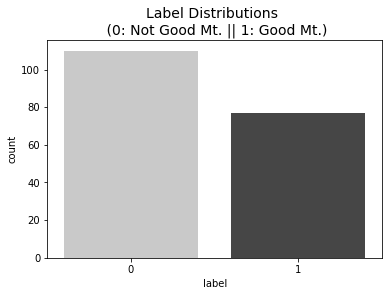

In [21]:
pal = ['#C9C9C9', '#464646']
sns.countplot('label', data=MT_train, palette=pal)
plt.title('Label Distributions \n (0: Not Good Mt. || 1: Good Mt.)', fontsize=14)
plt.show()

In [22]:
X = MT_train.iloc[:,:-1]
y = MT_train.iloc[:,-1]

X.shape, y.shape

((187, 6), (187,))

In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=13)
re_X, re_y = smote.fit_resample(X, y)
re_X.shape, re_y.shape

((220, 6), (220,))

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(re_X, re_y, test_size=0.2, random_state=13)

#### 성능확인을 위한 함수

In [25]:
def get_result(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    return get_clf_eval(y_test, pred)

In [26]:
def get_result_pd(models, model_names, X_train, y_train, X_test, y_test):
    col_names = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    tmp = []
    
    for model in models:
        tmp.append(get_result(model, X_train, y_train, X_test, y_test))
        
    return pd.DataFrame(tmp, columns=col_names, index=model_names)

In [27]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score)

def get_clf_eval(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    re = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)
    
    return acc, pre, re, f1, auc

In [28]:
from sklearn.metrics import confusion_matrix

def print_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    acc, pre, re, f1, auc = get_clf_eval(y_test, pred)
    
    print('=> confusion matrix')
    print(confusion)
    print('=============')
    
    print('Accuracy: {0:.4f}, Precision: {1:.4f}'.format(acc, pre))
    print('Recall: {0:.4f}, F1: {1:.4f}, AUC:{2:.4f}'.format(re, f1, auc))

### 모델 학습

In [29]:
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingRegressor

In [30]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=13, solver='liblinear')
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

print_clf_eval(y_test, lr_pred)

=> confusion matrix
[[22  3]
 [ 2 17]]
Accuracy: 0.8864, Precision: 0.8500
Recall: 0.8947, F1: 0.8718, AUC:0.8874


In [31]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

print_clf_eval(y_test, dt_pred)

=> confusion matrix
[[24  1]
 [ 3 16]]
Accuracy: 0.9091, Precision: 0.9412
Recall: 0.8421, F1: 0.8889, AUC:0.9011


In [32]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1, n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

print_clf_eval(y_test, rf_pred)

=> confusion matrix
[[24  1]
 [ 3 16]]
Accuracy: 0.9091, Precision: 0.9412
Recall: 0.8421, F1: 0.8889, AUC:0.9011


In [33]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

pipe = Pipeline([('scaler', RobustScaler()),
                 ('clf', RandomForestClassifier())])

search_space = [{'clf': [DecisionTreeClassifier()],
                 'clf__max_depth': [3, 5, 10],
                 'clf__random_state': [10, 13, 15]},
                {'clf': [RandomForestClassifier()],
                 'clf__n_estimators': [10, 100, 1000],
                 'clf__max_depth': [3, 5, 10],
                 'clf__random_state': [10, 13, 15]},
                {'clf': [AdaBoostClassifier()],
                 'clf__n_estimators': [30, 100, 1000],
                 'clf__learning_rate': [1.0, 0.5, 0.1],
                 'clf__random_state': [10, 13, 15]},
                {'clf': [GradientBoostingClassifier()],
                 'clf__n_estimators' : [100, 500],
                 'clf__learning_rate' : [0.05, 0.1]},
                {'clf': [XGBClassifier()],
                 'clf__n_estimators': [100, 400],
                 'clf__learning_rate': [0.1, 0.3, 0.6],
                 'clf__max_depth': [3, 5, 10]}]

In [34]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(pipe, search_space, cv=5, verbose=0)
best_model = clf.fit(X_train, y_train)

/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs

[21:27:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:36] WARNING: /Users/runner/miniforge3/cond

/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs

[21:27:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:37] WARNING: /Users/runner/miniforge3/cond

/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs

[21:27:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:37] WARNING: /Users/runner/miniforge3/cond

/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs

[21:27:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:37] WARNING: /Users/runner/miniforge3/cond

/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs

[21:27:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:37] WARNING: /Users/runner/miniforge3/cond

/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs

[21:27:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:38] WARNING: /Users/runner/miniforge3/cond

/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs

[21:27:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:38] WARNING: /Users/runner/miniforge3/cond

/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs

[21:27:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:38] WARNING: /Users/runner/miniforge3/cond

/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs

[21:27:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:38] WARNING: /Users/runner/miniforge3/cond

/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs

[21:27:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:39] WARNING: /Users/runner/miniforge3/cond

/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs

[21:27:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:39] WARNING: /Users/runner/miniforge3/cond

/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs

[21:27:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:39] WARNING: /Users/runner/miniforge3/cond

/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs

[21:27:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:39] WARNING: /Users/runner/miniforge3/cond

/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs

[21:27:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:40] WARNING: /Users/runner/miniforge3/cond

/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs

[21:27:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:40] WARNING: /Users/runner/miniforge3/cond

/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs

[21:27:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:40] WARNING: /Users/runner/miniforge3/cond

In [35]:
best_model.best_estimator_

Pipeline(steps=[('scaler', RobustScaler()),
                ('clf',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=400,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

In [36]:
best_df_clf = best_model.best_estimator_
pred1 = best_df_clf.predict(X_test)

print_clf_eval(y_test, pred1)

=> confusion matrix
[[24  1]
 [ 3 16]]
Accuracy: 0.9091, Precision: 0.9412
Recall: 0.8421, F1: 0.8889, AUC:0.9011


## Test data predict

In [37]:
mn = list(list_100['name'])

In [38]:
temp = GMT
temp

,MNTN_CODE,MNTN_NM,MNTN_LOC,MNTN_HEIGHT,ROAD_EASY,ROAD_MID,ROAD_DIFF,ROAD_SUM,MNTN_RES,Sel_Cos,Raw_Cos
1,441801501,양각산,경상남도 거창군 웅양면 산포리,1158,35.54,0.99,0.0,36.53,<item><crcmrsghtngetcimageseq>http://www.fores...,0.722315,0.170821
5,481700701,망진산,경상남도 진주시,172,10.72,0.00,0.0,10.72,<item><crcmrsghtngetcimageseq>http://www.fores...,0.361158,0.140784
6,421101701,마적산,"강원도 춘천시 신북읍, 북산면",610,25.55,1.16,0.0,26.71,<item><crcmrsghtngetcimageseq>http://www.fores...,0.589768,0.113342
9,488604901,이방산,경상남도 산청군,716,23.86,0.00,0.0,23.86,<item><crcmrsghtngetcimageseq>http://www.fores...,0.361158,0.139474
10,421902401,함백산,"강원도 태백시, 영월군 상동읍, 정선군 고한읍",1573,17.97,0.00,0.0,17.97,<item><crcmrsghtngetcimageseq>http://www.fores...,0.589768,0.124897
...,...,...,...,...,...,...,...,...,...,...,...
1536,441301301,봉서산,충청남도 천안,158,139.79,1.58,0.0,141.37,<item><crcmrsghtngetcimageseq>http://www.fores...,0.000000,0.023464
1541,416300501,도락산,"충청북도 단양군 단성면, 대강면",965,37.86,1.20,0.0,39.06,<item><crcmrsghtngetcimageseq>http://www.fores...,0.884652,0.164248
1542,461100701,양을산,전라남도 목포,151,9.48,0.00,0.0,9.48,<item><crcmrsghtngetcimageseq>http://www.fores...,0.000000,0.027094
1546,418200601,고동산,"경기도 가평군 설악면, 양평군 서종면",600,23.41,0.00,0.0,23.41,<item><crcmrsghtngetcimageseq>http://www.fores...,0.294884,0.069076


In [46]:
MT_tt = pd.DataFrame(columns = GMT.columns)

In [47]:
idx_lt = []
for i in range(703):
    if temp.iloc[i]['MNTN_NM'] in mn:
        continue
    else:
        MT_tt = MT_tt.append(pd.DataFrame([list(temp.iloc[i])], columns = GMT.columns), ignore_index=True)
MT_tt

,MNTN_CODE,MNTN_NM,MNTN_LOC,MNTN_HEIGHT,ROAD_EASY,ROAD_MID,ROAD_DIFF,ROAD_SUM,MNTN_RES,Sel_Cos,Raw_Cos
0,441801501,양각산,경상남도 거창군 웅양면 산포리,1158,35.54,0.99,0.0,36.53,<item><crcmrsghtngetcimageseq>http://www.fores...,0.722315,0.170821
1,481700701,망진산,경상남도 진주시,172,10.72,0.00,0.0,10.72,<item><crcmrsghtngetcimageseq>http://www.fores...,0.361158,0.140784
2,421101701,마적산,"강원도 춘천시 신북읍, 북산면",610,25.55,1.16,0.0,26.71,<item><crcmrsghtngetcimageseq>http://www.fores...,0.589768,0.113342
3,488604901,이방산,경상남도 산청군,716,23.86,0.00,0.0,23.86,<item><crcmrsghtngetcimageseq>http://www.fores...,0.361158,0.139474
4,421902401,함백산,"강원도 태백시, 영월군 상동읍, 정선군 고한읍",1573,17.97,0.00,0.0,17.97,<item><crcmrsghtngetcimageseq>http://www.fores...,0.589768,0.124897
...,...,...,...,...,...,...,...,...,...,...,...
622,415903701,소리산,경기도 양평군 단월면,480,26.18,0.00,0.0,26.18,<item><crcmrsghtngetcimageseq>http://www.fores...,0.722315,0.132039
623,441301301,봉서산,충청남도 천안,158,139.79,1.58,0.0,141.37,<item><crcmrsghtngetcimageseq>http://www.fores...,0.000000,0.023464
624,461100701,양을산,전라남도 목포,151,9.48,0.00,0.0,9.48,<item><crcmrsghtngetcimageseq>http://www.fores...,0.000000,0.027094
625,418200601,고동산,"경기도 가평군 설악면, 양평군 서종면",600,23.41,0.00,0.0,23.41,<item><crcmrsghtngetcimageseq>http://www.fores...,0.294884,0.069076


In [ ]:
MT_test = MT_tt[['MNTN_HEIGHT', 'ROAD_EASY', 'ROAD_MID', 'ROAD_DIFF', 'ROAD_SUM', 'Sel_Cos', 'Raw_Cos']]
MT_test.to_csv('../data/Proj/UseData/MT_test_z.csv', encoding='utf-8', index=False)

In [40]:
MT_test = pd.read_csv('../data/Proj/UseData/MT_test_z.csv')
MT_test.drop(['ROAD_SUM'], axis=1, inplace=True)

In [41]:
MT_test

,MNTN_HEIGHT,ROAD_EASY,ROAD_MID,ROAD_DIFF,Sel_Cos,Raw_Cos
0,1158,35.54,0.99,0.0,0.722315,0.170821
1,172,10.72,0.00,0.0,0.361158,0.140784
2,610,25.55,1.16,0.0,0.589768,0.113342
3,716,23.86,0.00,0.0,0.361158,0.139474
4,1573,17.97,0.00,0.0,0.589768,0.124897
...,...,...,...,...,...,...
622,480,26.18,0.00,0.0,0.722315,0.132039
623,158,139.79,1.58,0.0,0.000000,0.023464
624,151,9.48,0.00,0.0,0.000000,0.027094
625,600,23.41,0.00,0.0,0.294884,0.069076


In [42]:
rs = RobustScaler()
rob_test = rs.fit_transform(MT_test)

#### predict

#### test data에 robustscaler

In [44]:
best_df_clf = best_model.best_estimator_
pred_prb =best_df_clf.predict_proba(rob_test)
pred_test = best_df_clf.predict(rob_test)

pred_test

/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,

In [48]:
test_rob = MT_tt
test_rob['label'] = list(pred_test)
test_rob['prob'] = list(pred_prb)
test_rob

,MNTN_CODE,MNTN_NM,MNTN_LOC,MNTN_HEIGHT,ROAD_EASY,ROAD_MID,ROAD_DIFF,ROAD_SUM,MNTN_RES,Sel_Cos,Raw_Cos,label,prob
0,441801501,양각산,경상남도 거창군 웅양면 산포리,1158,35.54,0.99,0.0,36.53,<item><crcmrsghtngetcimageseq>http://www.fores...,0.722315,0.170821,1,"[0.015230298, 0.9847697]"
1,481700701,망진산,경상남도 진주시,172,10.72,0.00,0.0,10.72,<item><crcmrsghtngetcimageseq>http://www.fores...,0.361158,0.140784,1,"[0.38293004, 0.61706996]"
2,421101701,마적산,"강원도 춘천시 신북읍, 북산면",610,25.55,1.16,0.0,26.71,<item><crcmrsghtngetcimageseq>http://www.fores...,0.589768,0.113342,1,"[0.11795783, 0.88204217]"
3,488604901,이방산,경상남도 산청군,716,23.86,0.00,0.0,23.86,<item><crcmrsghtngetcimageseq>http://www.fores...,0.361158,0.139474,1,"[0.38293004, 0.61706996]"
4,421902401,함백산,"강원도 태백시, 영월군 상동읍, 정선군 고한읍",1573,17.97,0.00,0.0,17.97,<item><crcmrsghtngetcimageseq>http://www.fores...,0.589768,0.124897,1,"[0.20300871, 0.7969913]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,415903701,소리산,경기도 양평군 단월면,480,26.18,0.00,0.0,26.18,<item><crcmrsghtngetcimageseq>http://www.fores...,0.722315,0.132039,1,"[0.020570636, 0.97942936]"
623,441301301,봉서산,충청남도 천안,158,139.79,1.58,0.0,141.37,<item><crcmrsghtngetcimageseq>http://www.fores...,0.000000,0.023464,0,"[0.9985016, 0.0014983794]"
624,461100701,양을산,전라남도 목포,151,9.48,0.00,0.0,9.48,<item><crcmrsghtngetcimageseq>http://www.fores...,0.000000,0.027094,0,"[0.9994618, 0.00053819356]"
625,418200601,고동산,"경기도 가평군 설악면, 양평군 서종면",600,23.41,0.00,0.0,23.41,<item><crcmrsghtngetcimageseq>http://www.fores...,0.294884,0.069076,0,"[0.9994618, 0.00053819356]"


In [49]:
len(list(test_rob[test_rob['label'] == 1]['MNTN_NM'].values))

257

In [50]:
cnt = 0
plus2good = []

for i in range(34):
    if list(test_rob[test_rob['label'] == 1]['MNTN_NM'])[i] in list(plus_100['name']):
        cnt += 1
        plus2good.append(list(test_rob[test_rob['label'] == 1]['MNTN_NM'])[i])
cnt, plus2good

(3, ['기백산', '유학산', '노추산'])

In [51]:
test_rob[test_rob['label'] == 1]['MNTN_NM']

0      양각산
1      망진산
2      마적산
3      이방산
4      함백산
      ... 
615    흑성산
617    남병산
620    장복산
621    적석산
622    소리산
Name: MNTN_NM, Length: 257, dtype: object

In [52]:
import random

rand_ch = [0] * 5
for i in range(5):
    num = random.randrange(153)
    rand_ch[i] = num
rand_ch

[97, 58, 103, 96, 118]

In [53]:
for idx in rand_ch:
    print(list(test_rob[test_rob['label'] == 1]['MNTN_NM'].values)[idx])

구학산
샘봉산
종자산
청계산
까치절산


In [56]:
len(list(test_rob[test_rob['label'] == 0]['MNTN_NM']))

370